In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from matplotlib.patches import ConnectionPatch
from matplotlib import gridspec, lines


In [2]:
plt.rcParams["font.size"]=15
plt.rcParams["savefig.dpi"]=80
os.makedirs("fig",exist_ok=True)

In [3]:
#Reads costs and sort by cost
mac=pd.read_csv("cost.csv",index_col=0,squeeze=True)
mac.sort()
sort_index =mac.index

#Abatement sorted by cost
abatement =pd.read_csv("abatement.csv").set_index("year")
abatement= abatement[sort_index]

#Baseline
baseline=pd.read_csv("baseline.csv").set_index("year")

#colors
colors =pd.read_csv("colors.csv",index_col=0,squeeze=True)

#dictionary
long_names = pd.read_csv("dict.csv",index_col=0,squeeze=True)


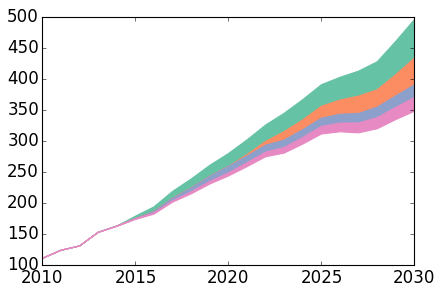

In [4]:
#Wedge curve
wedge = pd.concat([baseline, -abatement],axis=1).cumsum(axis=1)

ax=plt.subplot(1,1,1)
for i in range(len(mac)):
    x=wedge.index
    y=wedge.iloc[:,i]
    y2= wedge.iloc[:,i+1]
    ax.fill_between(x,y,y2,color=colors.iloc[i])

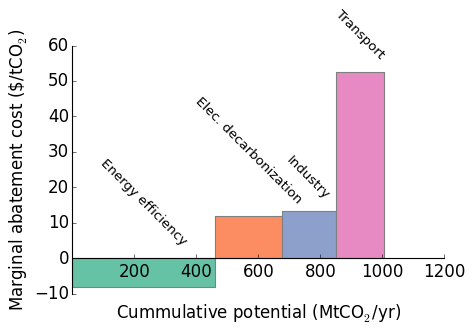

In [5]:
#MAC curve
potential = abatement.sum()
potential
ax=plt.subplot(1,1,1)

ax.bar(potential.cumsum()-potential,mac,width=potential,color=colors,edgecolor="grey")

ax.spines['bottom'].set_position("zero")
ax.spines['right'].set_color('none')

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

#removes the 0 from the x axis ticks
ax.xaxis.get_major_ticks()[0].draw = lambda *args:None

plt.ylabel("Marginal abatement cost (\$/tCO$_2$)")
plt.xlabel("Cummulative potential (MtCO$_2$/yr)",labelpad=20)


for name in mac.index:
    ax.annotate(long_names[name],
                 xy=((potential.cumsum()[name]-potential[name]/2),max(0,mac[name])),xycoords='data',
                 xytext=(0, 10), textcoords='offset points',ha="center",va="bottom",size=12,rotation=-45
            )

plt.savefig("fig/macc.png",bbox_inches="tight")


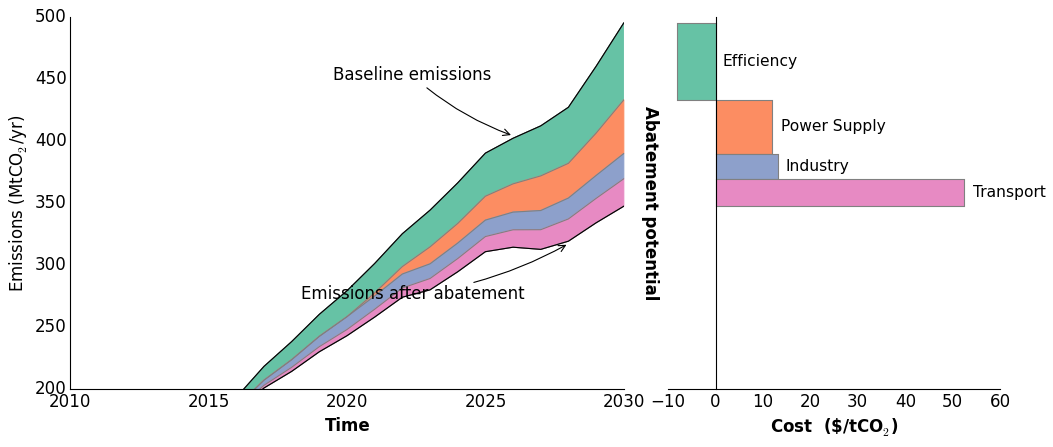

In [7]:
potential = abatement.iloc[-1,:]

fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2,
                       width_ratios=[5,3],
                       )

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1],sharey=ax1)

#plots wedges against time
ax1.plot(wedge.index.values,wedge,color="grey")#,linewidth=.5
for i in range(len(mac)):
    x=wedge.index
    y=wedge.iloc[:,i]
    y2= wedge.iloc[:,i+1]
    ax1.fill_between(x,y,y2,color=colors.iloc[i])
ax1.set_ylabel("Emissions (MtCO$_2$/yr)")
ax1.set_xlabel("Time",fontweight='bold')
ax1.set_ylim(ymin=200)


#plots flipped mac curve
ax2.barh(baseline.iloc[-1,0]-(potential.cumsum()-potential),mac,height=-potential,color=colors,edgecolor='grey')
ax2.set_xlabel("Cost  (\$/tCO$_2$)",fontweight='bold')

#Spance between the two panels
plt.subplots_adjust(wspace=.1)

for name in mac.index.values.tolist():
    ax2.annotate(name,
             xy=(max(0,mac[name]),baseline.iloc[-1,0]-(potential.cumsum()[name]-potential[name]/2)),xycoords='data',
             xytext=(8, 0), textcoords='offset points',ha="left",size=14,va="center"
        )
    
ax2.spines['left'].set_position('zero')
#ax2.spines['bottom'].set_position('center')

ax2.spines['top'].set_color('none')
ax2.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['right'].set_color('none')
#ax1.spines['bottom'].set_position('zero')

#removes ticks 
for tic in ax2.yaxis.get_major_ticks()+ax1.yaxis.get_major_ticks()+ax2.xaxis.get_major_ticks()+ax1.xaxis.get_major_ticks():
    tic.tick1On = tic.tick2On = False
    
#remove names of sectors from wedge panel
plt.setp(ax2.get_yticklabels(), visible=False);

#Baseline and resulting emissions
ax1.plot(wedge.index.values,wedge.iloc[:,0],color="black")#,linewidth=.5
ax1.plot(wedge.index.values,wedge.iloc[:,-1],color="black")#,linewidth=.5

ax1.annotate("Baseline emissions",  xy=(2026,wedge.iloc[:,0][2026]+2),xycoords='data',ha="right",
          xytext=(-20, 50), textcoords='offset points', arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                            color="black", 
                            connectionstyle="arc3,rad=0.1",
                            )
            )

ax1.annotate("Emissions after abatement",  xy=(2028,wedge.iloc[:,-1][2028]-2),xycoords='data',ha="right",
          xytext=(-40, -50), textcoords='offset points', arrowprops=dict(arrowstyle="->", #linestyle="dashed",
                            color="black", 
                            connectionstyle="arc3,rad=0.1",
                            )
            )



ax2.text(-12,350,"Abatement potential",ha="right", rotation= -90, va="center",fontweight='bold' )

plt.savefig("fig/wedge_macc.png")